# Brent Oil Prices Analysis

## Importing Libraries

In [16]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
from src.utils import check_missing_data
from src.descriptive_statistics import describe_numerical, summarize_time
from src.plots import display_summary_table, plot_histogram, plot_time_series
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Data Analysis Workflow

### Data Understanding and Preprocessing

#### Load Data

In [2]:
# Load the dataset
df = pd.read_csv('../data/BrentOilPrices.csv')

In [3]:
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


#### Checking missing values

In [4]:
check_missing_data(df)

'Success: No missing values.'

In [5]:
print(len(df))

9011


#### Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\abraham.shimelis\AppData\Local\Temp\ipykernel_17112\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB


#### Data Overview

In [9]:
summarize_time(df, "Date")

Number of Unique Dates: 9011
Start Date: 1987-05-20 00:00:00
End Date: 2022-11-14 00:00:00


In [10]:
df_num = df[['Price']]
num_desc = describe_numerical(df_num)

In [11]:
display_summary_table(num_desc)


Price:
+----+---------+-----------+
|    | index   |     Price |
|----+---------+-----------|
|  0 | count   | 9011      |
|  1 | mean    |   48.4208 |
|  2 | std     |   32.8601 |
|  3 | min     |    9.1    |
|  4 | 25%     |   19.05   |
|  5 | 50%     |   38.57   |
|  6 | 75%     |   70.09   |
|  7 | max     |  143.95   |
+----+---------+-----------+


#### Univariate analysis 

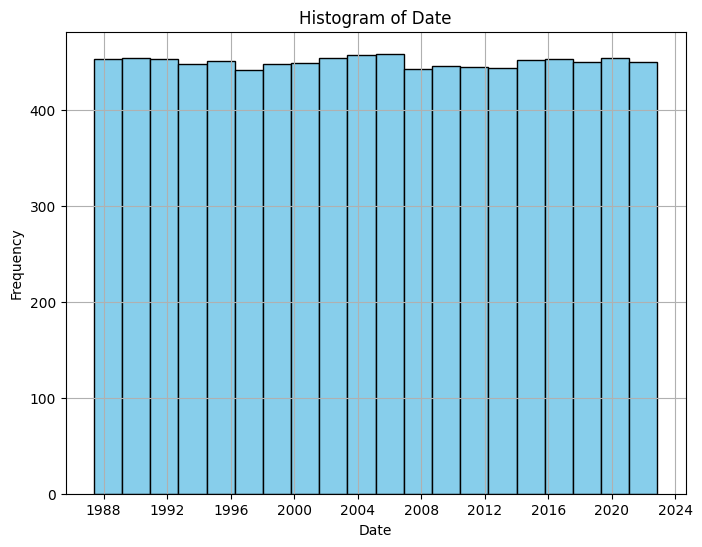

In [15]:
plot_histogram(df, 'Date')

#### Bivariate analysis

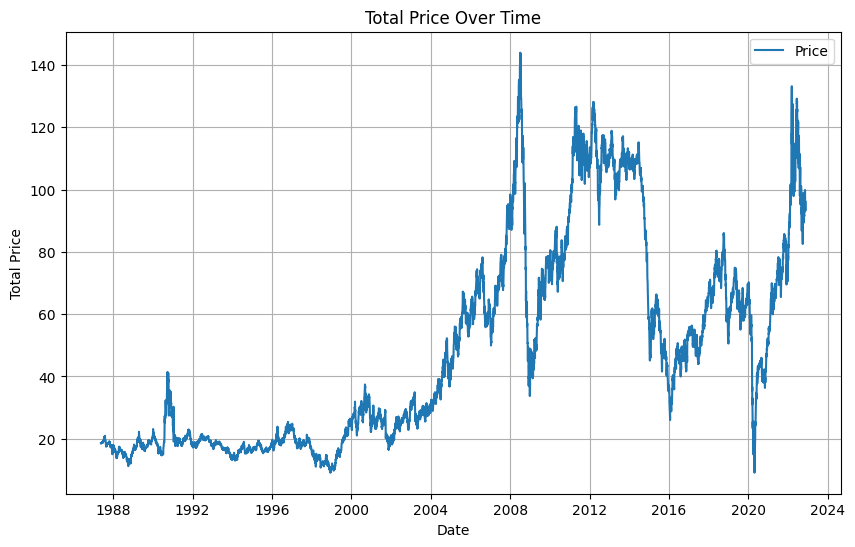

In [17]:
plot_time_series(df, 'Date', 'Price')